NOR8有問題! 剔除
把NOR1~NOR7複製到另一資料夾
copy時會有檔案名稱重複的問題，會被覆蓋->必須針對不同folder中的檔案重新命名!!

In [ ]:
# import os
# import shutil
# from copy_file import copy_nor

# # SD-OCT
# src_base_path = r'\\BOIL-NAS\homes\311514061\2024-5haveBG-SD-OCT dental calculus\2024dentalCalculus'
# dest_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\NOR'


# copy_nor(src_base_path,dest_path)


#OCTA
src_base_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA'
dest_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\NOR'

# copy_nor(src_base_path,dest_path)



把supra1~supra5複製到另一資料夾

In [7]:
# import os
# import shutil
# from copy_file import copy_supra

# # 定义源和目标路径
# src_base_path = r'\\BOIL-NAS\homes\311514061\2024-5haveBG-SD-OCT dental calculus\2024dentalCalculus'
# dest_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\CAL'
# copy_supra(src_base_path,dest_path)

#OCTA
src_base_path = r'\\BOIL-NAS\homes\311514061\2024_dc_OCTA'
dest_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\CAL'
copy_supra(src_base_path,dest_path)

正在复制 \\BOIL-NAS\homes\311514061\2024-5haveBG-SD-OCT dental calculus\2024dentalCalculus\supra6\npy_resize\npy 中的文件到 D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\CAL
正在复制 \\BOIL-NAS\homes\311514061\2024-5haveBG-SD-OCT dental calculus\2024dentalCalculus\supra7\npy_resize\npy 中的文件到 D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\CAL
正在复制 \\BOIL-NAS\homes\311514061\2024-5haveBG-SD-OCT dental calculus\2024dentalCalculus\supra8\npy_resize\npy 中的文件到 D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\CAL
完成复制任务


目標: 盡量把每個步驟都寫成函式存成py並放在同目錄，有需要時呼叫，這樣版面較整潔

In [1]:
import sys
sys.path.append(r"D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\reqiured_funcs") #存取所需函式的路徑


先把原始檔案npy轉png方便查看，把其中有問題的資料刪除，以避免不良訓練成果

也可能是data失衡導致的overfit，不一定要用此查看raw data

In [ ]:
import cvt_to_png

src_cal_folder=r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\CAL'
png_cal_folder=r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\CAL_png'
cvt_to_png.convert_npy_to_png(src_cal_folder,png_cal_folder)


#OCTA
# src_nor_folder=r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\NOR'
# png_nor_folder=r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\NOR_png'
# cvt_to_png.convert_npy_to_png(src_nor_folder,png_nor_folder)


透過引入以上路徑中的del_files.py，將沒用的file/folder刪除(慎用)
可以一次刪除多個目錄

In [ ]:
# from del_files import delete_files_in_directory,delete_folder

# # directory_to_clean=[r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train',
# #                     r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train_aug',
# #                     r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train_aug_jpeg',
# #                     r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test',
# #                     r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test_png',]


#OCTA
# # directory_to_clean=[r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\train',
# #                     r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\train_aug',
# #                     r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\train_aug_jpeg',
# #                     r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\test',
# #                     r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\test_png',]

# # # 刪除檔案
# delete_files_in_directory(*directory_to_clean)

# #遞迴刪除資料夾目錄樹
# #delete_folder(directory_to_clean) #成功執行，有時候會有莫名的PermissionError，重啟後再執行看看




思考如何切割資料

建立train test folder以及內建子folder nor cal (做一次即可)

In [22]:
from create_dir import create_directories
#root_dir=r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus'

#OCTA
root_dir=r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA'
create_directories(root_dir)

Directories created successfully.


目標: 利用NOR1~NOR6 作為train ; NOR7 supra5作為test(不能讓train test同時都含有同一子目錄的data，會有作弊的情形，導致model結果超乎預期的好) 

也就是說，我們用train_data來測試不包含在其中的test_data(兩者資料完全不能重複!)

不論換哪個資料，都遇到overfitting，copy備份NOR-複製 CAL-複製 & NOR_png-複製 CAL_png-複製 手動刪除可能有問題的data，並用刪除不良影像後的NOR
CAL作測試

CAL:del 
supra1 0-221  supra3 1-501 873-958 supra4:2-9 101-109 111-119 121-129...161-169

NOR: NOR7 340-440  NOR2 400-789

方便查看還有哪些檔案(怕自己忘記刪除哪幾個)

In [ ]:
# import os

# folder_path = r"D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\CAL_png - 複製"

# # 獲取目錄中的所有檔案名
# file_names = os.listdir(folder_path)

# # 過濾出以"supra4"為前綴的檔案並按順序排列
# supra4_files = sorted([file for file in file_names if file.startswith("supra4")])

# # 列印出符合條件的檔案名
# for file in supra4_files:
#     print(file)


把NOR1,NOR2開頭的放test，其他放train

In [9]:
import train_test_split 

# # 源目录和目标目录
# src_nor_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\NOR-複製'
# train_nor_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train\nor'
# test_nor_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test\nor'

# 源目录和目标目录
src_nor_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\NOR'
train_nor_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\train\nor'
test_nor_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\test\nor'

train_test_split.split(src_nor_path,train_nor_path,test_nor_path,'NOR1','NOR3')
#函式把全部NORcopy到train/nor的資料->所以準確率才100%!->修正函式後成功



Files copied successfully.


supra1,supra2 作為test

遇到module緩存問題，導致之後from train_test_split import split會直接使用上一次執行的結果! importlib清除緩存(沒用!)

考慮使用 train_test_split 模块的命名空间来调用 split :train_test_split.split

刪除有問題檔案， supra3 :1-500  873-958  

In [6]:
# import importlib
#from train_test_split import split

import train_test_split

# # 源目录和目标目录
# src_cal_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\CAL-複製'#空格也會影響路徑名
# train_cal_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train\cal'
# test_cal_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test\cal'

# 源目录和目标目录
# src_cal_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\CAL-複製'#空格也會影響路徑名
# train_cal_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\train\cal'
# test_cal_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\test\cal'



# 法一.清除模块缓存->無效
# importlib.reload(train_test_split)

# split(src_cal_path,train_cal_path,test_cal_path,'supra5')


# #法二:物件導向
# train_test_split.split(src_cal_path,train_cal_path,test_cal_path,'supra6','supra8') #改supra2(比較像異常組織)



Files copied successfully.


嘗試shuffle train test folder，避免model記住某特定資料順序造成overfitting
必做!!! 之後查看tSNE被錯分的影像，可以透過前綴快速找出是第幾張影像

In [ ]:
import os
import random

#如果文件名諱衝突才考慮用此code
def shuffle_files_in_folder(folder_path):
    # 遍历文件夹中的所有子文件夹
    for root, dirs, files in os.walk(folder_path):
        # 对每个子文件夹中的文件列表进行随机打乱
        random.shuffle(files)
        # 对每个文件进行重命名，加上随机数字前缀，以确保文件名的唯一性
        for i, file_name in enumerate(files):
            src_path = os.path.join(root, file_name)
            # 构造新的文件名，加上随机数字前缀，取5位數，因為有幾千筆data
            new_file_name = f"{i:05d}_{file_name}"
            #new_file_name = f"{file_name}"   #改成這樣就無法shuffle:why? 
            dst_path = os.path.join(root, new_file_name)
            # 重命名文件
            os.rename(src_path, dst_path)
            print(f"Shuffled file: {src_path} -> {dst_path}")

# 示例调用
#train_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train'
test_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test\nor'
#shuffle_files_in_folder(train_folder)
shuffle_files_in_folder(test_folder)


#OCTA
#train_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\train'
test_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\test\nor'
#shuffle_files_in_folder(train_folder)
shuffle_files_in_folder(test_folder)

#shuffle一次即可，不然前綴會一直累計


把train data aug，看overfitting有沒有改善

In [ ]:
from data_aug import data_augmentation_npy
src_paths=[r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train\nor',
           r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train\cal']
des_paths=[r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train_aug\nor',
           r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train_aug\cal']

#OCTA
src_paths=[r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\train\nor',
           r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\train\cal']
des_paths=[r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\train_aug\nor',
           r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\train_aug\cal']

for des_path in des_paths:
    os.makedirs(des_path, exist_ok=True)
    
#由於ImageDataGenerator 类不支持直接保存 .npy，先用save_format='jpeg'再搭配np.save(所以多的jpeg檔要再移到別的folder)
data_augmentation_npy(src_paths, des_paths) 

完成数据增强并保存至目标文件路径。


先讀取上面的data並省略下面aug的兩步驟，如果overfit的話再考慮

把aug folder中的jpeg檔移動到另一個名為aug_jpeg的folder

In [ ]:
import os
import shutil

# 源文件夹和目标文件夹路径
src_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train_aug'
dest_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train_aug_jpeg'


#OCTA
# 源文件夹和目标文件夹路径
src_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\train_aug'
dest_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\train_aug_jpeg'


# 创建目标文件夹（如果不存在）
os.makedirs(dest_folder, exist_ok=True)

# 遍历源文件夹中的子文件夹（cal 和 nor）
for subdir in ['cal', 'nor']:
    src_subfolder = os.path.join(src_folder, subdir)
    dest_subfolder = os.path.join(dest_folder, subdir)

    # 创建目标子文件夹（如果不存在）
    os.makedirs(dest_subfolder, exist_ok=True)

    # 遍历源子文件夹中的所有文件
    for file in os.listdir(src_subfolder):
        #print(file)
        src_file = os.path.join(src_subfolder, file)
        #print(src_file)

    #     # 检查文件是否为 .jpeg 格式:檔案格式要有完整路徑(故需要os.path.join)
        if os.path.isfile(src_file) and src_file.endswith('.jpeg'):
            # 移动文件到目标文件夹
            shutil.move(src_file, dest_subfolder)

print("所有 jpeg 文件已移动到目标文件夹。")


所有 jpeg 文件已移动到目标文件夹。


讀取data(2nd次執行code時，不用再重新分類，直接讀)

batch + concat 大降內存 速度快

先測試train/test 看model 訓練結果，不行再考慮train_aug/test

可考慮用多線程load data，看是否能加速讀取:load_data_with_queue.py/load_data_with_pool.py

用函式包住各種data、label生成過程，比較簡潔

In [1]:
import sys
sys.path.append(r"D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\reqiured_funcs") #存取所需函式的路徑


1st讀data方式 : 把from load_data import npy_batch_data_generator, load_npy_data...到train model之前的所有code包在generate_and_save_data中，快!

In [2]:
import load_save_pkl,os

# if __name__ == "__main__":
#     save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\pkl' # 替换为实际的保存路径
#     # 如果日期文件夹不存在，则创建它
#     if not os.path.exists(save_dir):
#         os.makedirs(save_dir)
    
#     train_nor_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train\nor'
#     test_nor_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test\nor'
#     train_cal_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train\cal'
#     test_cal_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test\cal'

#OCTA
if __name__ == "__main__":
    save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\pkl' # 替换为实际的保存路径
    # 如果日期文件夹不存在，则创建它
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    train_nor_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\code\2024_dc_OCTA\train\nor'
    test_nor_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\code\2024_dc_OCTA\test\nor'
    train_cal_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\code\2024_dc_OCTA\train\cal'
    test_cal_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\code\2024_dc_OCTA\test\cal'

    load_save_pkl.generate_and_save_data(train_nor_path, train_cal_path, test_nor_path, test_cal_path, save_dir)

Train labels shape: (9370, 1)
Test labels shape: (3850, 1)


下次直接跳過generate_and_save_data，直接load pkl

In [3]:

import load_save_pkl
import os

# if __name__ == "__main__":
#     save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\pkl'  # 替换为实际的保存路径

#     try:
#         train_data,train_labels,test_data,test_labels = load_save_pkl.load_data_pickle(save_dir, "data.pkl")
#         print("Loaded data and labels from pickle file.")
#     except FileNotFoundError as e:
#         print(e)

if __name__ == "__main__":
    save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\pkl'  # 替换为实际的保存路径

    try:
        train_data,train_labels,test_data,test_labels = load_save_pkl.load_data_pickle(save_dir, "data.pkl")
        print("Loaded data and labels from pickle file.")
    except FileNotFoundError as e:
        print(e)




Loaded data and labels from pickle file.


load pkl後記得做one hot encoding

In [ ]:
import keras
#%% one hot encoding
train_labels = keras.utils.to_categorical(train_labels, num_classes=2)
test_labels  = keras.utils.to_categorical(test_labels, num_classes=2)

2nd讀data方式(土法煉鋼)

In [ ]:
import numpy as np
from load_data import npy_batch_data_generator, load_npy_data

train_nor_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train\nor'
test_nor_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test\nor'
train_cal_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train\cal'
test_cal_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test\cal'

if __name__ == "__main__":
    train_folders = [train_nor_path,train_cal_path]
    test_folders =  [test_nor_path,test_cal_path]
    batch_size = 128 #增加batch，以加快讀取速度
    
    cal_train_gen, nor_train_gen, cal_test_gen, nor_test_gen = load_npy_data(train_folders, test_folders, batch_size) #在load_data中又會呼叫batch_data_generator

    cal_train_data = []
    for cal_batch in cal_train_gen:
        cal_train_data.append(cal_batch)
    cal_train_data = np.concatenate(cal_train_data, axis=0)

    nor_train_data = []
    for nor_batch in nor_train_gen:
        nor_train_data.append(nor_batch)
    nor_train_data = np.concatenate(nor_train_data, axis=0)

    cal_test_data = []
    for cal_batch in cal_test_gen:
        cal_test_data.append(cal_batch)
    cal_test_data = np.concatenate(cal_test_data, axis=0)

    nor_test_data = []
    for nor_batch in nor_test_gen:
        nor_test_data.append(nor_batch)
    nor_test_data = np.concatenate(nor_test_data, axis=0)

    #比原來data總數少一些! why?


跑完發現len(train_data)<len(test_data)，會有overfit問題

刪除多餘變量，不佔內存

當訓練model發現overfit時想重做，restart kernel把過多變量格式化

In [4]:
import sys

# 获取当前全局变量字典
current_module = sys.modules[__name__]

# 定义要刪除的字符串
strings_to_drop = ['batch','file','path','folder','gen']


# 删除不需要的变量
for var_name in list(current_module.__dict__.keys()):
    if  any(s in var_name for s in strings_to_drop):
        del current_module.__dict__[var_name]

# 现在只剩下需要的变量
print(list(current_module.__dict__.keys()))


['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__cached__', '_importable', 'user_specific_imports', '_imports', 'LazyImport', 'pd', 'np', 'dd', 'SparkContext', 'load_workbook', 'open_workbook', 'wr', 'mpl', 'plt', 'sns', 'py', 'go', 'px', 'dash', 'bokeh', 'alt', 'pydot', 'cv2', 'skimage', 'Image', 'imutils', 'statistics', 'stats', 'sm', 'fbprophet', 'Prophet', 'ARIMA', 'sklearn', 'LinearRegression', 'LogisticRegression', 'Lasso', 'LassoCV', 'Ridge', 'RidgeCV', 'ElasticNet', 'ElasticNetCV', 'PolynomialFeatures', 'StandardScaler', 'MinMaxScaler', 'RobustScaler', 'OneHotEncoder', 'LabelEncoder', 'TSNE', 'PCA', 'SimpleImputer', 'train_test_split', 'cross_val_score', 'GridSearchCV', 'RandomizedSearchCV', 'KFold', 'StratifiedKFold', 'svm', 'GradientBoostingClassifier', 'GradientBoostingRegressor', 'RandomForestClassifier', 'RandomForestRegressor', 'Tfid

跑stack會當機->之後想怎麼解決

內存不足所導致(可在tf環境打nvidia-smi查看)，分batch處理：

方案二：Memory-Mapped Files(內存映射文件) :成功而且code相對簡單

有效地減輕RAM負擔，數據存儲在磁盤上，並通過內存映射將數據的小片段加載到RAM，而不是一次性將整個數據集加載到RAM

In [5]:
# Save data to memory-mapped files:與code存取於相同的目錄
np.save('cal_train_data.npy', cal_train_data)
np.save('nor_train_data.npy', nor_train_data)
np.save('cal_test_data.npy', cal_test_data)
np.save('nor_test_data.npy', nor_test_data)

若已經存在正確的npy檔，下次直接加載即可(不是的話np.save npy的部分也要做)

In [6]:
# Load data as memory-mapped files
cal_train_data = np.load('cal_train_data.npy', mmap_mode='r')
nor_train_data = np.load('nor_train_data.npy', mmap_mode='r')
cal_test_data = np.load('cal_test_data.npy', mmap_mode='r')
nor_test_data = np.load('nor_test_data.npy', mmap_mode='r')

In [7]:
print(cal_train_data.shape)
print(nor_train_data.shape) #原來為2968

print(cal_test_data.shape)  #原:1866
print(nor_test_data.shape)  #原:1874

(4096, 224, 224, 3)
(1792, 224, 224, 3)
(2816, 224, 224, 3)
(1024, 224, 224, 3)


In [8]:

#train and test data
train_data = np.vstack((cal_train_data,nor_train_data))
test_data = np.vstack((cal_test_data,nor_test_data))

#cal & nor data
cal_data = np.vstack((cal_train_data,cal_test_data))
nor_data = np.vstack((nor_train_data,nor_test_data))

(6912, 224, 224, 3)
(2816, 224, 224, 3)


In [ ]:
print(train_data.shape)
print(test_data.shape)

In [9]:
#train sequence random shuffle
#shuffle pros: 1.improved generalization 2.avoid overfitting 
import random

train_seq = (np.arange(0,np.size(train_data,0),1)) #公差1之seq  #
random.shuffle(train_seq)
train_data = train_data[train_seq,:,:]

#train_seq可能有無效index，超過train_labels範圍，造成out of bound!

In [11]:
cal_train_upto=4096
nor_train_upto=2816

# create label 
cal_labels=np.ones((np.size(cal_data,0),1))
nor_labels = np.zeros((np.size(nor_data,0),1))

# split label
cal_train_labels, cal_test_labels = cal_labels[:cal_train_upto], cal_labels[cal_train_upto:]
nor_train_labels, nor_test_labels = nor_labels[:nor_train_upto], nor_labels[nor_train_upto:]

# merge label 
train_labels = np.vstack((cal_train_labels,nor_train_labels))
test_labels = np.vstack((cal_test_labels,nor_test_labels))

# #因應OutOfBound得下兩段code
# # 生成随机打乱顺序的索引
# train_seq = np.random.permutation(len(train_labels))

# # 确保 train_seq 的最大索引值在 train_labels 的范围内
# if np.max(train_seq) >= len(train_labels):
#     raise ValueError(f"train_seq contains out-of-bounds indices: max index {np.max(train_seq)}, train_labels size {len(train_labels)}")

# random shuffle
train_labels = train_labels[train_seq]

print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)

Train labels shape: (6912, 1)
Test labels shape: (2816, 1)


In [12]:
import sys

# 获取当前全局变量字典
current_module = sys.modules[__name__]

# 定义要保留的字符串
strings_to_drop = ['cal','nor','seq']

# 删除不需要的变量
for var_name in list(current_module.__dict__.keys()):
    if  any(s in var_name for s in strings_to_drop):
        del current_module.__dict__[var_name]

# 现在只剩下需要的变量:test_data test_labels train_data train_labels
print(list(current_module.__dict__.keys()))


['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__cached__', '_importable', 'user_specific_imports', '_imports', 'LazyImport', 'pd', 'np', 'dd', 'SparkContext', 'load_workbook', 'open_workbook', 'wr', 'mpl', 'plt', 'sns', 'py', 'go', 'px', 'dash', 'bokeh', 'alt', 'pydot', 'cv2', 'skimage', 'Image', 'imutils', 'statistics', 'stats', 'sm', 'fbprophet', 'Prophet', 'ARIMA', 'sklearn', 'LinearRegression', 'LogisticRegression', 'Lasso', 'LassoCV', 'Ridge', 'RidgeCV', 'ElasticNet', 'ElasticNetCV', 'PolynomialFeatures', 'OneHotEncoder', 'LabelEncoder', 'TSNE', 'PCA', 'SimpleImputer', 'train_test_split', 'cross_val_score', 'GridSearchCV', 'RandomizedSearchCV', 'KFold', 'StratifiedKFold', 'svm', 'GradientBoostingClassifier', 'GradientBoostingRegressor', 'RandomForestClassifier', 'RandomForestRegressor', 'TfidfVectorizer', 'CountVectorizer', 'metrics', 'sg', 

In [13]:
import keras

In [5]:
#%% one hot encoding
train_labels = keras.utils.to_categorical(train_labels, num_classes=2)
test_labels  = keras.utils.to_categorical(test_labels, num_classes=2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

使用train/test data出現overfit ->改用train_aug/test

存取model的路徑要記得改->看是跑SD-OCT 還是OCTA並動態調整

In [ ]:
from keras.applications import ResNet50, VGG16,NASNetMobile
from keras.layers import Input, Flatten, Dense,Dropout,concatenate,Conv2D, MaxPooling2D, AvgPool2D,Add
from keras.models import Model
from keras.optimizers import RMSprop, Adagrad,SGD,Adam
import numpy as np
import time
from datetime import datetime
from keras.callbacks import Callback,EarlyStopping

# 定义早停法
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
callback=Callback()


ind=0.7  #acc不到0.8，沒存model
start_time=time.time()
num_epoch=10
####### 定义权重分配比例################
resnet_weight = 0.5
vgg_weight = 0.5
#nas_weight=0.5

#符號多部分就是要調整的部分

#一次3個model就會crash!
# 创建 ResNet50 模型实例，include_top=False 表示不包含顶部的全连接层
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# # 创建 VGG16 模型实例，include_top=False 表示不包含顶部的全连接层
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# 创建 NASNetMobile 模型实例，include_top=False 表示不包含顶部的全连接层
nas = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) #non-ideal choice


# 将 ResNet50 模型作为一个层添加到 ensemble 模型中，並進行加權
resnet_output = resnet.output
resnet_output = Flatten()(resnet_output)#可添加dropout在後
resnet_output=Dropout(0.2)(resnet_output)
resnet_output = Dense(256, activation='relu')(resnet_output)*resnet_weight

# 将 VGG16 模型作为一个层添加到 ensemble 模型中，並進行加權
vgg_output = vgg.output
vgg_output = Flatten()(vgg_output) #可添加dropout在後
vgg_output=Dropout(0.2)(vgg_output)
vgg_output = Dense(256, activation='relu')(vgg_output)*vgg_weight

# 将 NASNetMobile 模型作为一个层添加到 ensemble 模型中，並進行加權
nas_output = nas.output
nas_output = Flatten()(nas_output)
#nas_output = Dense(256, activation='relu')(nas_output)*nas_weight

########### 合并两个模型的输出 : 依照自己要的output客製化增減####################
merged_output = concatenate([resnet_output,vgg_output])

# 添加自定义的分类层
predictions = Dense(2, activation='sigmoid')(merged_output)

########### 创建 ensemble 模型####################
ensemble_model = Model(inputs=[resnet.input,vgg.input], outputs=predictions)

# 编译 ensemble 模型
ensemble_model.compile(optimizer=SGD(lr=1e-3), loss='binary_crossentropy', metrics=['accuracy']) 
#SGD不佳:可以嘗試Adagrad Adam Momentum

# 存储每个epoch的训练准确率、验证准确率和测试准确率
train_loss_history = []
valid_loss_history = []
test_loss_history = []

# 存储每个epoch的训练准确率、验证准确率和测试准确率
train_accuracy_history = []
valid_accuracy_history = []
test_accuracy_history = []
##不能定義在loop內部!不然每次都會重置##

# 設置計數器以檢查連續epoch中的精度提升
no_improvement_count = 0
max_no_improvement = 5  # 定義最大不提升次數


for epoch in range(num_epoch):

    ############# 训练 ensemble 模型，传递相同的数据给两个模型####################
    history=ensemble_model.fit([train_data, train_data], train_labels, batch_size=16, epochs=1, validation_split=0.2, verbose=1,callbacks=[early_stopping,callback])
    #batch_size太小會有震盪問題!

    # 记录训练损失
    train_loss = history.history['loss'][-1]
    train_loss_history.append(train_loss)

    # 记录验证损失
    valid_loss = history.history['val_loss'][-1]
    valid_loss_history.append(valid_loss)

    # 记录训练准确率
    train_accuracy = history.history['accuracy'][-1]
    train_accuracy_history.append(train_accuracy)

    # 记录验证准确率
    valid_accuracy = history.history['val_accuracy'][-1]
    valid_accuracy_history.append(valid_accuracy)

    ############## 进行预测并计算准确率##################
    loss, acc = ensemble_model.evaluate([test_data,test_data], test_labels) #expect 2 inputs! -> [test_data,test_data]

    # 保存测试损失
    test_loss_history.append(loss)

    # 保存测试准确率
    test_accuracy_history.append(acc)

    # 檢查是否有精度提升，如果沒有，增加計數器
    if acc <= ind:
        no_improvement_count += 1
    else:
        no_improvement_count = 0
    
    # 如果連續epoch中沒有提升，則結束迴圈
    if no_improvement_count >= max_no_improvement:
        print(f'No improvement for {max_no_improvement} epochs. Stopping training.')
        break

    # 如果准确率更高，保存模型
    if acc > ind:
        ind = acc

        # 将模型保存到指定目录
        best_model_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\best_results'

        # OCTA
        best_model_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\best_results'


        if not os.path.exists(best_model_path):
            os.makedirs(best_model_path)
                # 创建日期子目录
        today_date = datetime.now().strftime("%Y-%m-%d")
        save_dir = os.path.join(best_model_path, today_date)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        #記得改檔名
        model_filename = 'ensemble_ResNet50_{}_&VGG16_{}_SGD_acc={}.h5'.format(resnet_weight,vgg_weight,round(acc,4))
        ensemble_model.save(os.path.join(save_dir, model_filename)) 

    print(f'Epoch {epoch+1}/{num_epoch}, Test Accuracy: {acc}')  #epoch+1 的目的:略過初始的超大val_loss?


    # 计算并输出训练时间
    model_training_time = time.time() - start_time
    minutes, seconds = divmod(model_training_time, 60)
    print(f"Training time: {int(minutes)} min and {round(seconds, 4)} sec")




跑完後明天測試tSNE是否可以正常顯示圖片

訓練中途interrupt，最好關閉重開code，以免大量var佔內存，在跑np.stack那邊當機

下次可以直接load model 不用重新訓練

In [17]:
#%%load model : 從日期那邊微調路徑!
from keras.models import load_model

# 指定模型檔案路徑:記得從日期那邊微調路徑!
model_path = r"D:/OCT/dental OCT/bare tooth/ensemble_model_aug/best_results/2024-05-22/ensemble_ResNet50_0.5_&VGG16_0.5_SGD_acc=0.7919.h5"

#OCTA
model_path = r"D:/OCT/dental OCT/bare tooth/ensemble_model_aug/code/2024_dc_OCTA/best_results/2024-05-22/ensemble_ResNet50_0.5_&VGG16_0.5_SGD_acc=0.7919.h5"


# 載入模型
ensemble_model = load_model(model_path)

https://blog.csdn.net/ytusdc/article/details/107738749 調參website

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt

# 定义保存路径
save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\loss_fig'

# OCTA
save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\loss_fig'

# 创建日期子目录
today_date = datetime.now().strftime("%Y-%m-%d")
save_dir = os.path.join(save_dir, today_date)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)


############### 构建保存文件路径################
# 构建保存文件路径 : 依據不同的optimizer命名fig
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S") #確保每次存取都有唯一名，不要覆蓋上次存取的圖
save_path = os.path.join(save_dir, f'ResNet50_{resnet_weight}&VGG16_{vgg_weight}_with_SGD(lr=1e-3)_loss_fig_{timestamp}.png')

# 截斷 train_loss_history 和 valid_loss_history 以使其長度相同 : 因為中間有Early_stop機制，會造成train_loss_history 和 valid_loss_history 的形狀不匹配使得圖出不來!
min_length = min(len(train_loss_history), len(valid_loss_history))

# 繪製损失隨 epoch 變化的曲线
plt.figure(figsize=(10, 6)) 
plt.plot(range(2, min_length + 2), train_loss_history, 'r-', label='Train Loss')
plt.plot(range(2, min_length + 2), valid_loss_history, 'b-', label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout() #自動調整圖的佈局，以確保軸標籤不被截斷


# 標示 y 座標數值
for i, loss in enumerate(train_loss_history[:min_length+1]):
    plt.text(i+2, loss, f'{loss:.4f}', fontsize=15, ha='center', va='bottom', color='red')

for i, loss in enumerate(valid_loss_history[:min_length+1]):
    plt.text(i+2, loss, f'{loss:.4f}', fontsize=15, ha='center', va='bottom', color='blue')


plt.savefig(save_path)
plt.show()

#圖不完整變成要手動存!


標數值在圖上

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt

# Define the save directory
save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\acc_fig'

#OCTA
save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\acc_fig'


# Create a subdirectory for the current date
today_date = datetime.now().strftime("%Y-%m-%d")
save_dir = os.path.join(save_dir, today_date)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)


# Build the save file path : 記得改檔名
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
save_path = os.path.join(save_dir, f'ResNet50_{resnet_weight}&VGG16_{vgg_weight}_with_SGD(lr=1e-3)_acc_fig_{timestamp}.png')

# 截斷 train_loss_history 和 valid_loss_history 以使其長度相同 : 因為中間有Early_stop機制，造成train_loss_history 和 valid_loss_history 的形狀不匹配!
min_length = min(len(train_accuracy_history), len(valid_accuracy_history),len(test_accuracy_history))


# 繪製损失隨 epoch 變化的曲线
# Plot accuracy vs. epoch
plt.figure(figsize=(10, 6))  # 設置圖片尺寸為寬度10英寸，高度6英寸
plt.plot(range(2, min_length+2), train_accuracy_history,'r', label='Train Accuracy')
plt.plot(range(2, min_length+2), valid_accuracy_history,'g', label='Validation Accuracy')
plt.plot(range(2, min_length+2), test_accuracy_history,'b', label='Test Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right') #調整圖例位置
plt.grid(True)
plt.tight_layout() #自動調整圖的佈局，以確保軸標籤不被截斷


# Annotate each point with its accuracy value : 順序要放對(放中間)! 放最下面會失敗
# xytext : 移動數值位置座標 -> 沒辦法到很精準 ------------------------------------------>捨棄改用plt.text!!!
# for i, acc in enumerate(train_accuracy_history[:min_length+1]):
#     plt.annotate(f'{acc:.4f}', (i+2, acc), textcoords="offset points", xytext=(0,15), ha='center')

# for i, acc in enumerate(valid_accuracy_history[:min_length+1]):
#     plt.annotate(f'{acc:.4f}', (i+2, acc), textcoords="offset points", xytext=(0,-10), ha='center')  # xytext : 移動數值位置座標

# for i, acc in enumerate(test_accuracy_history[:min_length+1]):
#     plt.annotate(f'{acc:.4f}', (i+2, acc), textcoords="offset points", xytext=(0,15), ha='center')

# 標示 y 座標數值
for i, acc in enumerate(train_accuracy_history[:min_length+1]):
    plt.text(i+2, acc, f'{acc:.4f}', fontsize=15, ha='center', va='top', color='red')  #注意數值位置改為top!

for i, acc in enumerate(valid_accuracy_history[:min_length+1]):
    plt.text(i+2, acc, f'{acc:.4f}', fontsize=15, ha='center', va='bottom', color='green')

for i, acc in enumerate(test_accuracy_history[:min_length+1]):
    plt.text(i+2, acc, f'{acc:.4f}', fontsize=15, ha='center', va='bottom', color='blue')




plt.savefig(save_path)
plt.show()



In [9]:
#%% expected shape :(103,142,1)
prediction = ensemble_model.predict([test_data,test_data])


In [ ]:
#%%plot model
from keras.utils import plot_model
plot_model(ensemble_model, to_file='model.png')  

In [ ]:

#如何同時呈現不同權重時的ROC_curve?


from sklearn.metrics import confusion_matrix
# 假设 C 是您的混淆矩阵
spe = [] #specificity
sen = [] #sensitivity   
tar = 0
for i in range(test_labels.shape[0]):
    p = 1*(prediction[:,1] < prediction[i,1])
    t = np.argmax(test_labels, axis=1)
    C = confusion_matrix(p, t)  # 举例的混淆矩阵
    CC = np.sum(C, axis=0)
    NC = C / CC  # Normalized C
    spe = np.concatenate((spe, [NC[1,1]]))
    sen = np.concatenate((sen, [NC[0,0]]))
    tarn = C[0,1]+C[1,0]
    if tarn>tar:
        tar = tarn
        thresh = prediction[i,1]
spe = np.concatenate((spe, [0, 1]))
sen = np.concatenate((sen, [1, 0]))
print(spe)
print(sen)

# Define the save directory
save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\ROC'

# OCTA
save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\ROC'

# Create a subdirectory for the current date
today_date = datetime.now().strftime("%Y-%m-%d")
save_dir = os.path.join(save_dir, today_date)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)



# Build the save file path
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
save_path = os.path.join(save_dir, f'ResNet50_{resnet_weight}&VGG16_{vgg_weight}_SGD(1e-3).png')

#%% 
print(plt.style.available)

from sklearn.metrics import auc

plt.figure(figsize=(10, 6))  # 設置圖片尺寸為寬度10英寸，高度6英寸(不然fig太小)
plt.style.use('_mpl-gallery')
plt.rcParams["font.family"] = "Times New Roman"    #rcParams : designate picture pixels
plt.rcParams["axes.titlepad"] = 15
plt.plot(sorted(sen),sorted(1-spe),'b.-')
#plt.scatter(sen,1-spe)
plt.title('ROC curve', fontsize=16, fontweight='bold')
plt.xlabel('1-Specificity', size = 16)
plt.ylabel('Sensitivity', size = 16)
plt.ylim(-.0, 1)
plt.xlim(-.0, 1)

# 计算 AUC 面积 :記得sorted! 因為是按照數值趨勢去畫圖
roc_auc = auc(sorted(sen), sorted(1 - spe))
# 在图上标注 AUC 面积的数值 : 有順序性，所以等圖出來再標示數值
plt.text(0.6, 0.2, f'AUC = {roc_auc:.2f}', fontsize=40, fontweight='bold', color='red',ha='center', va='center')

plt.tight_layout() #自動調整圖的佈局，以確保軸標籤不被截斷，以確保軸標籤不被截斷
plt.savefig(save_path)  #預設dpi大小為100
plt.show()

#沒辦法code存，只好先手動存!! ->plt.tight_layout() #自動調整圖的佈局，以確保軸標籤不被截斷

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 假设 C 是您的混淆矩阵
p = np.argmax(prediction, axis=1)
t = np.argmax(test_labels, axis=1)
C = confusion_matrix(p, t)  # 举例的混淆矩阵

CC = np.sum(C, axis=0)
NC = C / CC  # Normalized C


# Define the save directory
save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\confusion_M'

# OCTA
save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\confusion_M'


# Create a subdirectory for the current date
today_date = datetime.now().strftime("%Y-%m-%d")
save_dir = os.path.join(save_dir, today_date)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Build the save file path
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
save_path = os.path.join(save_dir, f'ResNet50_{resnet_weight}&VGG16_{vgg_weight}_SGD(1e-3)_normalized_{timestamp}.png')



# 绘制归一化混淆矩阵
#plt.subplot(121)
plt.figure(figsize=(10, 5))
plt.imshow(NC, interpolation='nearest', cmap=plt.cm.Blues, extent=(-0.5, len(NC) - 0.5, len(NC) - 0.5, -0.5))
plt.title('Normalized confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.grid(False)


# 添加文本标签(也就是cal nor 數量)到归一化混淆矩阵
thresh = NC.max() / 2.
for i in range(len(NC)):
    for j in range(len(NC[0])):
        plt.text(j, i, format(NC[i, j], '.2f'),  #normalize取到小數點後2位: .2f
                 horizontalalignment="center",
                 color="white" if NC[i, j] > thresh else "black",
                 fontsize=20,  # 调整字体大小
                 fontweight='bold')  # 调整字体粗细
        
plt.tight_layout()
plt.savefig(save_path)
plt.show()



# Build the save file path
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
save_path = os.path.join(save_dir, f'ResNet50_{resnet_weight}&VGG16_{vgg_weight}_SGD(1e-3)_{timestamp}.png')
#檔名記得隨optimizer的不同，動態修改


# 绘制混淆矩阵
#plt.subplot(122)
plt.figure(figsize=(10, 5))
plt.imshow(C, interpolation='nearest', cmap=plt.cm.Blues, extent=(-0.5, len(C) - 0.5, len(C) - 0.5, -0.5))
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.grid(False)

# 添加文本标签(也就是cal nor 數量)到混淆矩阵
thresh = C.max() / 2.
for i in range(len(C)):
    for j in range(len(C[0])):
        plt.text(j, i, format(C[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if C[i, j] > thresh else "black",
                 fontsize=20,  
                 fontweight='bold')

plt.tight_layout()
plt.savefig(save_path)
plt.show()


#cal_test:896 nor_test:960


perplexity調小後，資料點較分散

In [ ]:
"""
1.加載圖像：從指定的文件夾中加載圖像，分別為 cal_folder 和 nor_folder。
2.確定圖像的真實標籤：通過文件夾的名稱來確定每張圖像的True Label，如果圖像位於 cal_folder 中，則將其標籤設置為 'cal'，如果位於 nor_folder 中，則將其標籤設置為 'nor'。
3.計算預測標籤：使用模型對測試數據進行預測，並根據預測結果獲取每個數據點的預測標籤。
4.生成 t-SNE 圖表：使用 t-SNE 對中間層輸出進行降維，然後根據真實標籤將數據分組，並在圖表中顯示各組的數據點。
5.顯示圖像與標籤：根據圖像的真實標籤，在 t-SNE 圖表中對應的數據點上顯示相應的圖像和標籤。
6.將 t-SNE 圖表轉換為 HTML：將生成的 t-SNE 圖表轉換為 HTML 字符串。
7.保存 HTML 文件：將生成的 HTML 字符串保存為 HTML 文件。"""

True label:看圖 Predicted label: 看資料點

chatgpt下指令突破點:
現在你知道真實影像的來源，那請幫我在combined_labels = [f'{tooltips[i]}<br>True Label: {true_labels_group[i]}<br>Predicted Label: {layer_output_label_predict[i]}' for i in range(len(group))] 這段，針對真實影像顯示出正確的<br>True Label: {true_labels_group[i]}，若影像是來自於cal_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\test_png\cal' ，<br>True Label: {true_labels_group[i]} 要顯示cal，若影像是來自於cal_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\test_png\nor' ，<br>True Label: {true_labels_group[i]} 要顯示nor


最新改版:試試看  解決資料點跟Predicted label的矛盾，但實際影像為cal，應該設定為True label:cal  True 
label要跟oct影像互相對應! 差此步->成功!

透過以下函式查看plot_and_save_tSNE中的layer_name(最後一層的layer.name)

In [15]:
#%% 
from keras import backend as K
def get_output_layer(model, layer_name):
    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in ensemble_model.layers])
    layer = layer_dict[layer_name]
    return layer

print([(layer.name, layer) for layer in ensemble_model.layers])

[('input_4', <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x0000019FCA8746A0>), ('conv1_pad', <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x000001A46105EEB0>), ('conv1_conv', <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001A683754280>), ('conv1_bn', <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001A6837545E0>), ('conv1_relu', <tensorflow.python.keras.layers.core.Activation object at 0x000001A6837956A0>), ('pool1_pad', <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x000001A6837952B0>), ('pool1_pool', <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001A683498850>), ('conv2_block1_1_conv', <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001A6834987F0>), ('conv2_block1_1_bn', <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001A683498E80>), ('conv2_block1_1_relu', <tensorflow.python.keras.

先把test folder中的npy檔轉為png，tSNE才能匯入圖片

In [ ]:
from cvt_to_png import cvt_to_png
# src_folder=r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test'
# png_folder=r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test_png'


src_folder=r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\test'
png_folder=r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\test_png'


cvt_to_png(src_folder,png_folder)

更改import進來的函式，記得用importlib.reload

In [99]:
import importlib
import sys


# 添加函式檔案的路徑
sys.path.append(r"D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\reqiured_funcs")

# 假設你的函式在 my_functions.py 中
import tSNE

# 確保加載最新版本
importlib.reload(tSNE)

<module 'tSNE' from 'D:\\OCT\\dental OCT\\bare tooth\\ensemble_model_aug\\code\\reqiured_funcs\\tSNE.py'>

如何匯入指定日期的pkl? 直接手動copy最方便

In [7]:
import os,load_save_pkl

# if __name__ == "__main__":
#     save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\pkl' # 替换为实际的保存路径
#     # 如果日期文件夹不存在，则创建它
#     if not os.path.exists(save_dir):
#         os.makedirs(save_dir)
    
#     train_nor_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train\nor'
#     test_nor_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test\nor'
#     train_cal_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train\cal'
#     test_cal_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test\cal'


#OCTA
if __name__ == "__main__":
    save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\pkl' # 替换为实际的保存路径
    # 如果日期文件夹不存在，则创建它
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    train_nor_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\train\nor'
    test_nor_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\test\nor'
    train_cal_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\train\cal'
    test_cal_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\test\cal'



    load_save_pkl.generate_and_save_data(train_nor_path, train_cal_path, test_nor_path, test_cal_path, save_dir)

Train labels shape: (9370, 1)
Test labels shape: (3850, 1)


In [5]:
import os,load_save_pkl 

if __name__ == "__main__":
    save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\pkl'  # 替换为实际的保存路径
    file_name="data.pkl"
    date="2024-05-26"

    try:
        train_data, train_labels,test_data,test_labels = load_save_pkl.load_data_pickle(save_dir, file_name,date)
        print("Data loaded successfully.")
    except FileNotFoundError as e:
        print(e)

#OCTA
if __name__ == "__main__":
    save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dc_OCTA\pkl'  # 替换为实际的保存路径
    file_name="data.pkl"
    date="2024-05-26"

    try:
        train_data, train_labels,test_data,test_labels = load_save_pkl.load_data_pickle(save_dir, file_name,date)
        print("Data loaded successfully.")
    except FileNotFoundError as e:
        print(e)

#tSNE只需要使用到test_data, test_labels


Data loaded successfully.


In [7]:
print(len(test_data))

2


In [3]:
from keras.models import load_model

# 指定模型檔案路徑:記得從日期那邊微調路徑!
model_path = r"D:/OCT/dental OCT/bare tooth/ensemble_model_aug/best_results/2024-05-25/ensemble_ResNet50_0.5_&VGG16_0.5_SGD_acc=0.7403.h5"
# 載入模型
ensemble_model = load_model(model_path)

很多藍點Cal，Predicted label卻顯示nor

最佳結果(不亂動)

有可能遇到緩存問題導致一直出現之前的錯誤結果!

In [ ]:
#from tSNE import plot_and_save_tSNE #會有緩存問題，必須reload修訂版函式

import tSNE 

# Load images from folder
cal_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test_png\cal'
nor_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test_png\nor'

#save tSNE img
save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\tSNE'

#2nd 參數請比照get_output_layer的最後一個layer.name
#tSNE.plot_and_save_tSNE(ensemble_model,'dense_5',[test_data,test_data],test_labels,save_dir,cal_folder,nor_folder, label_name=['Nor', 'Cal'])
tSNE.plot_tSNE_latest(ensemble_model, 'dense_5', [test_data,test_data], test_labels, save_dir, cal_folder, nor_folder, label_name=['Nor', 'Cal'])
#tSNE.plot_tSNE_try(ensemble_model,'dense_5',[test_data,test_data],test_labels,save_dir,cal_folder,nor_folder,label_name= ['Nor', 'Cal'])

#添加資訊，此Nor/Cal 樣本來自於nor1~nor7/supra1~supra5的哪筆data

要使用 k 最近鄰（KNN）來繪製 t-SNE 圖中的 cal 和 nor 的邊界，你可以執行以下步驟：

使用 t-SNE 轉換後的二維特徵表示（Y）作為訓練數據的特徵。
將資料點的真實標籤（cal 或 nor）作為訓練數據的目標標籤。
初始化並訓練 k 最近鄰分類器。
繪製分界線。

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 使用 t-SNE 轉換後的二維特徵表示作為訓練數據的特徵
X_train = Y

# 將資料點的真實標籤（cal 或 nor）作為訓練數據的目標標籤
y_train = df['label'].values

# # 初始化並訓練 k 最近鄰分類器
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)

batch_size = 1000  # 定義批次大小

# 初始化並訓練 k 最近鄰分類器
knn = KNeighborsClassifier(n_neighbors=5)

# 將資料分成多個批次處理
for i in range(0, len(X_train), batch_size):
    X_batch = X_train[i:i+batch_size]
    y_batch = y_train[i:i+batch_size]
    # knn.partial_fit(X_batch, y_batch, classes=np.unique(y_train))
    knn.fit(X_batch, y_batch, classes=np.unique(y_train))
# 定義繪製分界線的函數
def plot_decision_boundary(model, ax, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel會出事!! -> MemoryError: Unable to allocate 16.1 GiB for an array with shape (432326650, 5) and data type int64
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, alpha=0.5)

# 生成 t-SNE 圖
fig, ax = plt.subplots(figsize=(10, 8))
ax.margins(0.05)

# 繪製 t-SNE 散點圖
for label, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=label, alpha=0.8)

# 繪製分界線
plot_decision_boundary(knn, ax, X_train, y_train)

# 添加圖例
ax.legend()

plt.title('tSNE with Decision Boundary (KNN)')
plt.show()


為了解決MemError這個問題，你可以採取以下幾種方法：

減少資料量：可以減少資料集的大小，例如僅使用部分資料點進行模型訓練和預測，這樣可以減少記憶體的使用量。
增加記憶體：如果你的硬體設備允許，可以增加系統的記憶體，這樣就可以容納更大的資料集。
使用近似方法：可以考慮使用近似的最近鄰算法，例如 Ball Tree 或 KD Tree，這些方法可以減少記憶體的使用量。
使用分批處理：可以將資料分成多個批次進行處理，這樣可以降低每個批次的記憶體使用量。

用code畫出TSNE中，nor跟cal邊界

結合gradCAM資訊到TSNE 高難度!!(可做可不做，自行選擇)

整合版(下方附分解後的子函式，以便觀察OUTPUT)

In [6]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image as PILImage
from IPython.display import display, Image as IPImage
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import keras.applications.xception as xception

# Function to extract image name without extension
def extract_image_name(filename):
    return os.path.splitext(filename)[0]

def generate_and_display_gradcam(img_path, model_builder, last_conv_layer_name, preprocess_input, decode_predictions, img_size=(299, 299), alpha=0.4, cam_path="save_cam_image.jpg", original_name=None):
    # Load image
    def get_img_array(img_path, size):
        img = load_img(img_path, target_size=size)
        array = img_to_array(img)
        array = np.expand_dims(array, axis=0)
        return array

    # Generate Grad-CAM heatmap
    def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
        grad_model = tf.keras.models.Model(
            [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
        )

        with tf.GradientTape() as tape:
            last_conv_layer_output, preds = grad_model(img_array)
            if pred_index is None:
                pred_index = tf.argmax(preds[0])
            class_channel = preds[:, pred_index]

        grads = tape.gradient(class_channel, last_conv_layer_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

        last_conv_layer_output = last_conv_layer_output[0]

        cam = tf.reduce_sum(tf.multiply(pooled_grads, last_conv_layer_output), axis=-1)
        cam = tf.nn.relu(cam)

        heatmap = cam / tf.reduce_max(cam)
        return heatmap.numpy()

    # Save and display Grad-CAM
    def save_and_display_gradcam(img_path, heatmap, cam_path="save_cam_image.jpg", alpha=0.4):
        img = load_img(img_path)
        img = img_to_array(img)

        heatmap = np.uint8(255 * heatmap)

        jet = mpl.cm.get_cmap("jet")

        jet_colors = jet(np.arange(256))[:, :3]
        jet_heatmap = jet_colors[heatmap]

        jet_heatmap = array_to_img(jet_heatmap)
        jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
        jet_heatmap = img_to_array(jet_heatmap)

        Superimposed_img = jet_heatmap * alpha + img
        Superimposed_img = array_to_img(Superimposed_img)

        Superimposed_img.save(cam_path)
        display(IPImage(cam_path))

  

    # Preprocess and prepare the image
    img_array = preprocess_input(get_img_array(img_path, size=img_size))

    # Make model with imagenet dataset
    model = model_builder(weights="imagenet")
    model.layers[-1].activation = None

    # Generate Grad-CAM heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Save and display Grad-CAM
    save_and_display_gradcam(img_path, heatmap, cam_path=cam_path, alpha=alpha)


C:\Users\BOIL\AppData\Local\Temp\ipykernel_8908\3861457684.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = mpl.cm.get_cmap("jet")


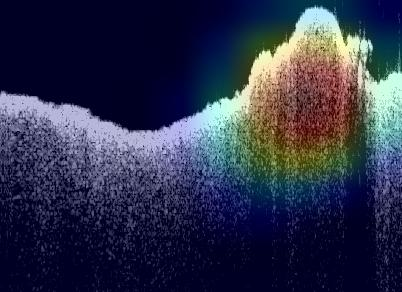

In [7]:
output_png_path = r'\\BOIL-NAS\home\Dental OCT\tooth_data_png\201903220033.png'

# Call the function with required parameters
generate_and_display_gradcam(
    img_path=output_png_path,
    model_builder=xception.Xception,
    last_conv_layer_name="block14_sepconv2_act",
    preprocess_input=xception.preprocess_input,
    decode_predictions=xception.decode_predictions,
    img_size=(299, 299),
    alpha=0.4,
    cam_path="save_cam_image.jpg"
)

如何讓cal/nor_folder跟cal/nor_folder_CAM的影像對的上?

In [ ]:
# #有bug 就restart kernel
# import os

# def delete_files_in_directory(directory):
#     # 遍历目录中的所有文件和子目录
#     for root, dirs, files in os.walk(directory):
#         # 删除所有文件
#         for file in files:
#             file_path = os.path.join(root, file)
#             os.remove(file_path)
#             print(f"Deleted {file_path}")
        
#         # 递归删除子目录中的所有文件
#         for dir in dirs:
#             subdir_path = os.path.join(root, dir)
#             delete_files_in_directory(subdir_path)

# # 要删除文件的目录路径
# directory_to_clean = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\test_png_CAM\cal_CAM'

# # 删除目录中的所有文件
# delete_files_in_directory(directory_to_clean)

# print("All files have been deleted.")

依序編號file並自己改名

In [ ]:
# import os
# import shutil

# # 指定原始图片文件夹和目标文件夹
# source_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\test_png\cal'
# target_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\test_png\cal_renamed'

# # 确保目标文件夹存在，如果不存在则创建
# if not os.path.exists(target_folder):
#     os.makedirs(target_folder)

# # 获取原始文件夹中的所有图片文件
# image_files = [file for file in os.listdir(source_folder) if file.endswith('.png')]

# # 遍历图片文件，并按照指定规则重命名
# for i, filename in enumerate(image_files):
#     new_filename = f'cal_test_{i+1}.png'
#     source_path = os.path.join(source_folder, filename)
#     target_path = os.path.join(target_folder, new_filename)
#     shutil.copyfile(source_path, target_path)

# print("图片重命名完成！")


In [ ]:
import os
import shutil

# 指定原始图片文件夹和目标文件夹
source_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\test_png\nor'
target_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\test_png\nor_renamed'

# 确保目标文件夹存在，如果不存在则创建
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

# 获取原始文件夹中的所有图片文件
image_files = [file for file in os.listdir(source_folder) if file.endswith('.png')]

# 遍历图片文件，并按照指定规则重命名
for i, filename in enumerate(image_files):
    new_filename = f'nor_test_{i+1}.png'
    source_path = os.path.join(source_folder, filename)
    target_path = os.path.join(target_folder, new_filename)
    shutil.copyfile(source_path, target_path)

print("图片重命名完成！")


图片重命名完成！


In [ ]:
# Define the CAM folders
cal_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\test_png\cal_renamed'
nor_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\test_png\nor_renamed'

In [ ]:
# generate_and_display_gradcam(
#     img_path=output_png_path,
#     model_builder=xception.Xception,
#     last_conv_layer_name="block14_sepconv2_act",
#     preprocess_input=xception.preprocess_input,
#     decode_predictions=xception.decode_predictions,
#     img_size=(299, 299),
#     alpha=0.4,
#     cam_path="save_cam_image.jpg"
# )

In [ ]:
import os

# Define the original image folders
cal_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\test_png\cal_renamed'
nor_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\test_png\nor_renamed'

# Define the CAM folders
cal_folder_CAM = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\test_png_CAM\cal_CAM'
nor_folder_CAM = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\test_png_CAM\nor_CAM'

# Check if the CAM folders exist, if not, create them
if not os.path.exists(cal_folder_CAM):
    os.makedirs(cal_folder_CAM)

if not os.path.exists(nor_folder_CAM):
    os.makedirs(nor_folder_CAM)

# Function to extract image name without extension
def extract_image_name(filename):
    return os.path.splitext(filename)[0]

# Process images in cal_folder
cal_files = os.listdir(cal_folder)
cal_files.sort()  # Sort the files
for i, filename in enumerate(cal_files):
    img_path = os.path.join(cal_folder, filename)
    cam_path = os.path.join(cal_folder_CAM, f"cal_CAM_{i+1}.jpg")  # Modify the cam_path for saving Grad-CAM result
    original_name = extract_image_name(filename)  
    generate_and_display_gradcam(img_path=img_path, model_builder=xception.Xception,
                                 last_conv_layer_name="block14_sepconv2_act",
                                 preprocess_input=xception.preprocess_input,
                                 decode_predictions=xception.decode_predictions,
                                 cam_path=cam_path,
                                 original_name=original_name)  #多一個original_name，要添加到舊函式

# Process images in nor_folder
nor_files = os.listdir(nor_folder)
nor_files.sort()  # Sort the files
for i, filename in enumerate(nor_files):
    img_path = os.path.join(nor_folder, filename)
    cam_path = os.path.join(nor_folder_CAM, f"nor_CAM_{i+1}.jpg")  # Modify the cam_path for saving Grad-CAM result
    original_name = extract_image_name(filename)  
    generate_and_display_gradcam(img_path=img_path,  model_builder=xception.Xception,
                                 last_conv_layer_name="block14_sepconv2_act",
                                 preprocess_input=xception.preprocess_input,
                                 decode_predictions=xception.decode_predictions,
                                 cam_path=cam_path,
                                 original_name=original_name)


In [ ]:
import os

# Define the CAM folders
cal_folder_CAM = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\test_png_CAM\cal_CAM'
nor_folder_CAM = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\test_png_CAM\nor_CAM'

# Check if the CAM folders exist, if not, create them
if not os.path.exists(cal_folder_CAM):
    os.makedirs(cal_folder_CAM)

if not os.path.exists(nor_folder_CAM):
    os.makedirs(nor_folder_CAM)

# Process images in cal_folder
for filename in os.listdir(cal_folder):
    img_path = os.path.join(cal_folder, filename)
    cam_path = os.path.join(cal_folder_CAM, f"{filename.split('.')[0]}_CAM.jpg")  # Modify the cam_path for saving Grad-CAM result
    generate_and_display_gradcam(
        img_path=img_path,
        model_builder=xception.Xception,
        last_conv_layer_name="block14_sepconv2_act",
        preprocess_input=xception.preprocess_input,
        decode_predictions=xception.decode_predictions,
        img_size=(299, 299),
        alpha=0.4,
        cam_path=cam_path
    )

# Process images in nor_folder
for filename in os.listdir(nor_folder):
    img_path = os.path.join(nor_folder, filename)
    cam_path = os.path.join(nor_folder_CAM, f"{filename.split('.')[0]}_CAM.jpg")  # Modify the cam_path for saving Grad-CAM result
    generate_and_display_gradcam(
        img_path=img_path,
        model_builder=xception.Xception,
        last_conv_layer_name="block14_sepconv2_act",
        preprocess_input=xception.preprocess_input,
        decode_predictions=xception.decode_predictions,
        img_size=(299, 299),
        alpha=0.4,
        cam_path=cam_path
    )


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from IPython.display import Image as IPImage, display

model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

output_png_path = r'\\BOIL-NAS\home\Dental OCT\tooth_data_png\201903220033.png'



## The local path to our target image

#img_path= output_png_path
#img_path=r'C:\Users\BOIL\OneDrive\圖片\nancy_graph\初戀.png'

# 打开 TIFF 文件

#display(IPImage(img_path))  # 秀原圖
display(IPImage(output_png_path))


"""利用load_img載入圖像並用img_to_array轉成array，並擴展維度，跟pretrained好的Xception model互相匹配"""
def get_img_array(img_path, size):
    ## `img` is a PIL image 
    img = load_img(img_path, target_size=size)
    array = img_to_array(img)
    ## We add a dimension to transform our array into a "batch" : because model expect input_shape:(batch_size, height, width, channels)
    array = np.expand_dims(array, axis=0)
    return array

"""從輸入映射到輸出"""
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    ## First, we create a model that maps the input image to the activations
    ## of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    ## Then, we compute the gradient of the top predicted class for our input image
    ## for the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    ## We are doing transfer learning on last layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    ## This is a vector where each entry is the mean intensity of the gradient : use global average pooling
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))


    ## calculates a heatmap highlighting the regions of importance in an image
    ## for a specific 
    ## predicted class by combining the output of the last convolutional layer
    ## with the pooled gradients.
    last_conv_layer_output = last_conv_layer_output[0]

    #原本算法
    # heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]  # GAP
    # heatmap = tf.squeeze(heatmap)

    # ## For visualization purpose
    # heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    #試看看別種計算grad方式，看是否能降噪
    # 计算CAM
    cam = tf.reduce_sum(tf.multiply(pooled_grads, last_conv_layer_output), axis=-1)
    cam = tf.nn.relu(cam)

    # 归一化CAM
    heatmap = cam / tf.reduce_max(cam)

    return heatmap.numpy()

In [3]:
## Preparing the image
img_array = preprocess_input(get_img_array(output_png_path, size=img_size))

## Making the model with imagenet dataset
model = model_builder(weights="imagenet")

## Remove last layer's softmax(transfer learning)
model.layers[-1].activation = None

preds = model.predict(img_array)
print("Predicted of image:", decode_predictions(preds, top=1)[0])

## Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)


Predicted of image: [('n03388043', 'fountain', 5.3040624)]


In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="save_cam_image.jpg", alpha=0.4):
    ## Loading the original image
    img = load_img(img_path)
    img = img_to_array(img)

    ## Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    ## Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    ## Create an image with RGB colorized heatmap
    jet_heatmap = array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = img_to_array(jet_heatmap)

    ## Superimpose the heatmap on original image
    Superimposed_img = jet_heatmap * alpha + img
    Superimposed_img = array_to_img(Superimposed_img)

    ## Save the superimposed image
    Superimposed_img.save(cam_path)
   

    ## Displaying Grad CAM
    display(IPImage(cam_path))


save_and_display_gradcam(output_png_path, heatmap)

In [ ]:
import os
output_png_path = r'\\BOIL-NAS\homes\311514061\Dental OCT\tooth_data_png'
save_cam_path=r'\\BOIL-NAS\homes\311514061\Dental OCT\tooth_data_cam'
os.makedirs(save_cam_path,exist_ok=True)



# Get a sorted list of filenames
sorted_filenames = sorted([filename for filename in os.listdir(output_png_path) if filename.endswith('.png')])  # 照順序輸出png檔
for filename in sorted_filenames:
    #print(filename)
    img_array = preprocess_input(get_img_array(output_png_path, size=img_size))


    preds = model.predict(img_array)
    
    ## Generate class activation heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    save_and_display_gradcam(output_png_path, heatmap, cam_path=os.path.join(save_cam_path, filename))